In [23]:
import numpy as np                  # Arrays
import random                       # Random number generation 
import matplotlib.pyplot as plt     # General visualization
import networkx as nx               # Graph visualization 
from libpysal.weights import lat2W  #  Grid adjacency matrix creator

from tqdm import tqdm
import itertools

row = 0
col = 5

all_moves = list(itertools.product([-1,0,1], repeat=2))
all_moves.remove((0,0))
all_moves = np.array(all_moves)

neighbours = all_moves + np.array([(row, col) for i in range(8)])


[[-1 -1]
 [-1  0]
 [-1  1]
 [ 0 -1]
 [ 0  1]
 [ 1 -1]
 [ 1  0]
 [ 1  1]]


We model the floor plans of warehouses as graphs; nodes representing locations where stock is shelved and edges indicate an uninterrupted path between two locations.

A general process for making adjacency list representations of such graphs is required.

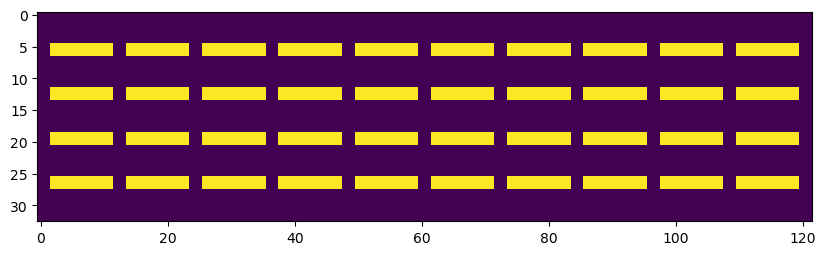

In [11]:
SHELF_SIZE = np.array([2, 10])
GAP_SIZE = np.array([5, 2])
NUM_SHELVES = np.array([4, 10])

GRID_SIZE = NUM_SHELVES*(GAP_SIZE + SHELF_SIZE) + GAP_SIZE

grid = np.zeros(GRID_SIZE)

for index, value in np.ndenumerate(grid):
    if np.all(((index) % (GAP_SIZE + SHELF_SIZE) >= GAP_SIZE)):
        grid[index] = 1


plt.figure(figsize = (10, 10))
plt.imshow(grid)
plt.show()



Iterating through grid to store location nodes.

In [13]:
class Node():
    def __init__(self, index, tickets, adjacent_indexes) -> None:
        self.index = index
        self.tickets = tickets
        self.adjacent_indexes = adjacent_indexes


In [25]:
NUM_NODES = np.product(GRID_SIZE) - (np.product(NUM_SHELVES)*np.product(SHELF_SIZE))
nodes = np.empty(NUM_NODES, dtype = Node)

current_index = 0

all_moves = list(itertools.product([-1,0,1], repeat=2))
all_moves.remove((0,0))
all_moves = np.array(all_moves)

for (row, col), value in np.ndenumerate(grid):
    if (value == 0):
        nodes[current_index] = current_index
        
        neighbours = all_moves + np.array([(row, col) for i in range(8)])
        print(neighbours)
        

        current_index += 1



[[-1 -1]
 [-1  0]
 [-1  1]
 [ 0 -1]
 [ 0  1]
 [ 1 -1]
 [ 1  0]
 [ 1  1]]
[[-1  0]
 [-1  1]
 [-1  2]
 [ 0  0]
 [ 0  2]
 [ 1  0]
 [ 1  1]
 [ 1  2]]
[[-1  1]
 [-1  2]
 [-1  3]
 [ 0  1]
 [ 0  3]
 [ 1  1]
 [ 1  2]
 [ 1  3]]
[[-1  2]
 [-1  3]
 [-1  4]
 [ 0  2]
 [ 0  4]
 [ 1  2]
 [ 1  3]
 [ 1  4]]
[[-1  3]
 [-1  4]
 [-1  5]
 [ 0  3]
 [ 0  5]
 [ 1  3]
 [ 1  4]
 [ 1  5]]
[[-1  4]
 [-1  5]
 [-1  6]
 [ 0  4]
 [ 0  6]
 [ 1  4]
 [ 1  5]
 [ 1  6]]
[[-1  5]
 [-1  6]
 [-1  7]
 [ 0  5]
 [ 0  7]
 [ 1  5]
 [ 1  6]
 [ 1  7]]
[[-1  6]
 [-1  7]
 [-1  8]
 [ 0  6]
 [ 0  8]
 [ 1  6]
 [ 1  7]
 [ 1  8]]
[[-1  7]
 [-1  8]
 [-1  9]
 [ 0  7]
 [ 0  9]
 [ 1  7]
 [ 1  8]
 [ 1  9]]
[[-1  8]
 [-1  9]
 [-1 10]
 [ 0  8]
 [ 0 10]
 [ 1  8]
 [ 1  9]
 [ 1 10]]
[[-1  9]
 [-1 10]
 [-1 11]
 [ 0  9]
 [ 0 11]
 [ 1  9]
 [ 1 10]
 [ 1 11]]
[[-1 10]
 [-1 11]
 [-1 12]
 [ 0 10]
 [ 0 12]
 [ 1 10]
 [ 1 11]
 [ 1 12]]
[[-1 11]
 [-1 12]
 [-1 13]
 [ 0 11]
 [ 0 13]
 [ 1 11]
 [ 1 12]
 [ 1 13]]
[[-1 12]
 [-1 13]
 [-1 14]
 [ 0 12]
 [ 0 14]
 [ 1 1